In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Discussion 15A - DFT

## Review

Recall that the Discrete Fourier Transform (DFT) is a change of basis to the DFT basis. We denote our time domain signal as $\vec{x} = \begin{bmatrix}x[0] & x[1] & \cdots & x[N-1]\end{bmatrix}^\top$.

The basis vectors in the frequency domain are given by $\vec{u}_0, \ldots \vec{u}_{N-1}$, where
$$u_k[n] = \frac{1}{\sqrt{N}} e^{j \frac{2\pi}{N}kn} = \frac{1}{\sqrt{N}} W_N^{kn} \quad \text{where } W_N = e^{j\frac{2\pi}{N}}$$

To transform a vector from time domain to frequency domain, we apply the formula
$$\vec{X} = F^{-1}\vec{x} = F^*\vec{x}$$
where
$$F
=
\begin{bmatrix}
\mid & & \mid\\
\vec{u}_0 & \cdots & \vec{u}_{N-1}\\
\mid & & \mid
\end{bmatrix}$$
$F$ is an orthonormal matrix.

## Problem 1

For parts A-C, assume that $N=9$.

### Part A

Take the DFT of $x[n] = \cos \left(\frac{2\pi}{N} n\right)$.

### Part B

Fill in the blanks to implement the DFT and verify that your solution to part A is accurate.

In [2]:
def W_N(N):
    """Return the value of W_N"""
    ## HINT: use 1j to denote sqrt(-1)
    #### BEGIN SOL #####
    return np.exp(1j * 2 * np.pi / N)
    ### END SOL ###

In [3]:
def make_F_star(N):
    """Create the F* matrix"""
    wn = W_N(N)
    F_star = np.zeros((N,N)).astype(np.complex_)
    for a in range(N):
        for b in range(N):
            ### BEGIN SOL ###
            F_star[a][b] = 1 / np.sqrt(N) * wn ** (- a * b)
            ### END SOL ###
    return F_star

In [4]:
## Create the signal from part A
N = 9
n = np.linspace(0,8,9)
x = np.cos(2 * np.pi * n / 9)
### BEGIN SOL ####
X = make_F_star(N) @ x.T
### END SOL ###

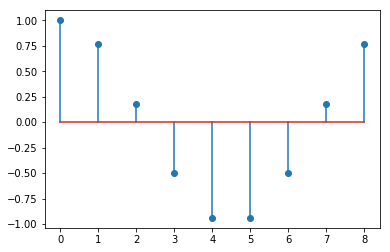

In [5]:
# Plot our signal in the time domain
plt.stem(n, x)
plt.show()

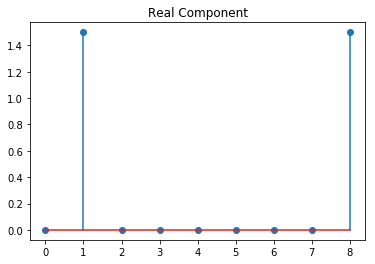

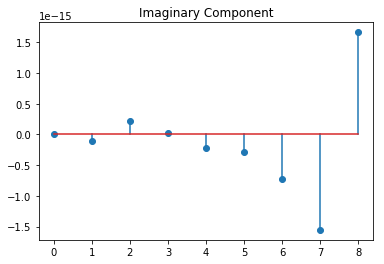

In [6]:
# Plot our signal in the frequency domain
plt.stem(n, np.real(X))
plt.title("Real Component")
plt.show()
plt.stem(n, np.imag(X))
plt.title("Imaginary Component")
plt.show()

### Part C

Try taking the DFT different real valued signals for $x$. Do you notice anything interesting?

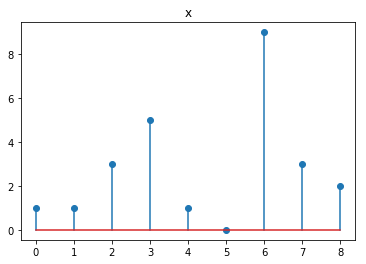

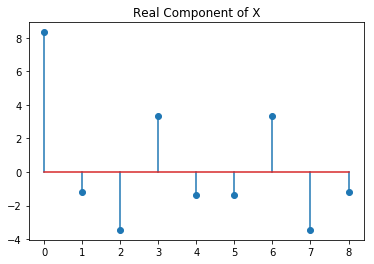

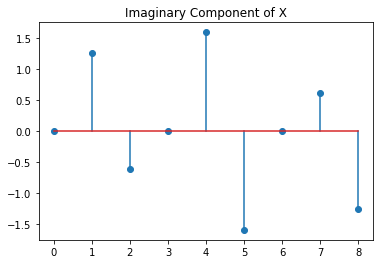

In [7]:
#x = [1, 2, 3, 2, 1, 0, 4, 8, 2]
#x = [1, 1, 1, 1, 1, 1, 1, 1, 1]
x = [1, 1, 3, 5, 1, 0, 9, 3, 2]
assert(len(x) == 9)
### BEGIN SOL ####
X = make_F_star(len(x)) @ np.array(x).T
### END SOL ###

plt.stem(n,x)
plt.title("x")
plt.show()
plt.stem(n,np.real(X))
plt.title("Real Component of X")
plt.show()
plt.stem(n,np.imag(X))
plt.title("Imaginary Component of X")
plt.show()

### Part D

Show that if $\vec{x}$ is real valued, then $\vec{X}$ exhibits conjugate symmetry. That is, show that for $\vec{x} \in \mathbb{R}^N$, $X[k] = X^*[N-k]$. For what values of $k$ does $X[k]$ correspond to high frequency components? What about for low frequencies?

### Part E

Show that if $\vec{x}_1, \vec{x}_2$ have corresponding DFT's $\vec{X}_1, \vec{X}_2$, the DFT of $\vec{x}_3 = \vec{x}_1 + \vec{x}_2$ is $\vec{X}_3 = \vec{X}_1 + \vec{X}_2$. Why does this make sense intuitively? Verify this with your code.

### Part F

Let the time-domain signal $\vec{x}$ corresponds to its DFT $\vec{X}$. Circularly shift $\vec{x}$ to become $\vec{x}'$ such that $x'[i] = x[i - 1]$, and $x'[0] = x[n]$. What is the relationship between $\vec{X}'$, $\vec{x}'$'s DFT, and $\vec{X}$? Verify this with your code.

### Part G

From Stats 153: Suppose the DFT of an $h$-length signal $\vec{x}$ is $\vec{X}$. Now we create a signal $\vec{y}$, which is a repeated version of $x$. More specifically, $y$ is a length $k \cdot h$ signal which looks like $\vec{y} = \begin{bmatrix} \vec{x}^T & \vec{x}^T & \cdots & \vec{x}^T \end{bmatrix}^T$. Show that the DFT of $\vec{y}$ is $Y[i] = \begin{cases}\sqrt{k} X[m], & \text{when $i = mk, m \in \mathbb{Z}$} \\ 0, & \text{otherwise}\end{cases}$.

## Problem 2: A Custom "Taylor-ed" Filter

Your friend Colin recently went to a concert and wants to share a recording of the music with you. Unfortunately, you soon realize that someone has added an annoying high pitched buzz to the recording, making it impossible to enjoy the music. Luckily, as a 16B student, you now possess the necessary skills to remove the buzz using the DFT.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

In [9]:
# Let's play the recording
# Lower your volume BEFORE playing
file = "audio.wav"
Audio(file)

### Part A: Read in data, take the DFT

In [10]:
# Read in the data, and take the DFT of the left and right channels
# data is an np array with shape (N,2). The two columns correspond to the left and right audio channels
fs, data = wavfile.read(file)
x_left = data[:,0]
x_right = data[:,1]

### BEGIN SOL ###
X_left = np.fft.fft(x_left, norm="ortho")
X_right = np.fft.fft(x_right, norm="ortho")
### END SOL ###

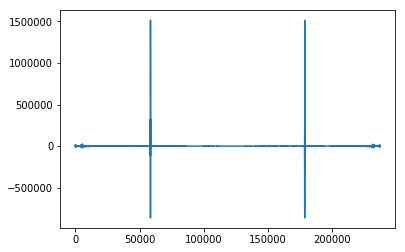

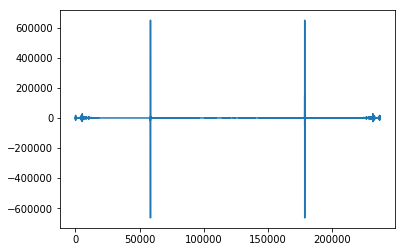

In [11]:
# Plot out the spectrum of the signal
plt.plot(np.real(X_left))
plt.show()
plt.plot(np.real(X_right))
plt.show()

### Part B: Filter out high frequencies, take the inverse DFT

In [12]:
data_new = np.copy(data)
X_left_new = np.copy(X_left)
X_right_new = np.copy(X_right)

### BEGIN SOL ###
thresh = 50000
X_left_new[thresh:-thresh] = 0
X_right_new[thresh:-thresh] = 0
### END SOL ###

### BEGIN SOL ###
x_left_new = np.fft.ifft(X_left_new, norm="ortho")
x_right_new = np.fft.ifft(X_right_new, norm="ortho")
### END SOL ###

data_new[:,0] = np.real(x_left_new)
data_new[:,1] = np.real(x_right_new)

wavfile.write("denoised.wav",fs,data_new)
Audio('denoised.wav')